In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 16

In [2]:
# read csv files
file_dir = '../csv_files/'
train_set = 'dips'
test_set = 'db5_test'
model = 'model_4_2'
num_samples = 120
num_steps = 40

df_list = []
for i in range(1):
    file_name = f'{test_set}_{model}_{num_samples}_samples_{num_steps}_steps_{train_set}_{i}'
    df = pd.read_csv(f'{file_dir}{file_name}.csv')
    df['run'] = i
    df_list.append(df)

In [3]:
def sort_df(df_list, score='energy'):
    df = pd.concat(df_list)
    if score == 'energy':
        result_df = df.copy().sort_values(by=score, ascending=True).groupby('id')
    elif score == 'confidence_logits':
        result_df = df.copy().sort_values(by=score, ascending=False).groupby('id')
    top1 = result_df.head(1).copy()
    top5 = result_df.head(5).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top10 = result_df.head(10).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top25 = result_df.head(25).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top40 = result_df.head(40).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    best = df.sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    # merge dataframes
    top1['method'] = 'Top-1'
    top5['method'] = 'Top-5'
    top10['method'] = 'Top-10'
    top25['method'] = 'Top-25'
    best['method'] = 'Oracle'

    # merge the dataframes 
    df_merged = pd.concat([top1, top5, top10, top25, best])

    # get the order
    cols = ['Top-1', 'Top-5', 'Top-10', 'Top-25', 'Oracle']

    df_merged['method'] = pd.Categorical(df_merged['method'], categories=cols, ordered=True)

    # separate for each metric
    df_DockQ = df_merged.pivot(index='id', columns='method', values='DockQ')[cols]

    df_sr = pd.DataFrame()
    df_sr['Acceptable'] = df_DockQ[(df_DockQ >= 0.23)].count() / df_DockQ.shape[0]
    df_sr['Medium'] = df_DockQ[(df_DockQ >= 0.49)].count() / df_DockQ.shape[0]
    df_sr['High'] = df_DockQ[(df_DockQ >= 0.8)].count() / df_DockQ.shape[0]
    df_sr = df_sr.reset_index()
    return df_sr, top1, best

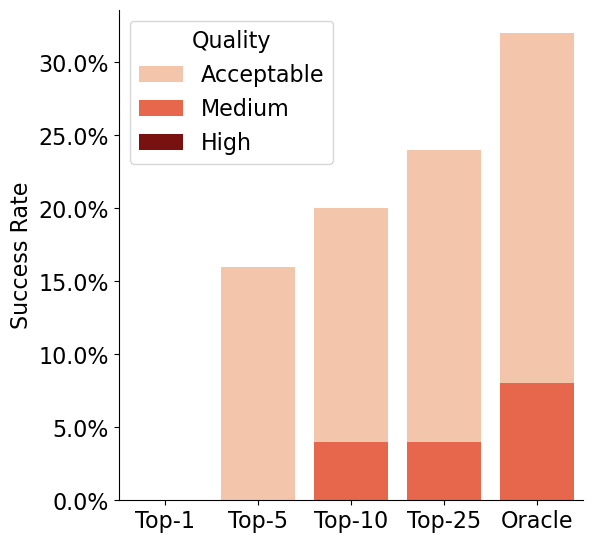

In [4]:
df_sr, top1, best = sort_df(df_list, score='energy')
melted_df = pd.melt(df_sr, id_vars='method', var_name='Quality', value_name='Success Rate')

# Define custom colors for pastel red, muted red, and dark red
custom_palette = ["#FFC3A0", "#FF5733", "#8B0000"]

g = sns.catplot(
    data=melted_df, 
    kind='bar', 
    x='method', 
    y='Success Rate', 
    hue='Quality', 
    dodge=False, 
    palette=custom_palette,
    height=6,
    aspect=1,
    legend_out=False,
) 

g.set_xlabels("")
g.ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt.ylim(0, 0.5)
plt.xticks(rotation=0)
#plt.savefig('DFMDock_db5_ab_ag.png', dpi=300, bbox_inches="tight")
plt.show()

In [5]:
merged_df = pd.merge(top1, best, on='id', suffixes=('_top1', '_best'))
merged_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,confidence_logits_top1,num_clashes_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,confidence_logits_best,num_clashes_best,run_best,method_best
0,1VFB,4,19.215473,8.384026,36.379539,0.000000,0.027594,-0.278714,0.007574,62,...,20.826235,9.800694,39.479023,0.300000,0.122397,-0.278330,0.003322,66,0,Oracle
1,1ZHI,50,20.192104,23.370438,53.242138,0.000000,0.009652,-0.278098,0.070994,1,...,13.747675,11.680644,23.797997,0.000000,0.043121,-0.275956,0.030823,11,0,Oracle
2,2A1A,71,9.043381,5.418968,22.736462,0.000000,0.064598,-0.278052,0.066821,11,...,7.391806,4.941333,19.973301,0.999999,0.412570,-0.277554,0.068924,9,0,Oracle
3,2SIC,7,8.787841,6.804770,21.215761,0.171429,0.118694,-0.277960,0.044007,6,...,2.100939,2.012110,5.732014,0.400000,0.481541,-0.277488,0.046209,1,0,Oracle
4,7CEI,102,11.503072,12.433825,21.156410,0.000000,0.051110,-0.277931,0.012467,0,...,9.225647,8.683230,19.905399,0.200000,0.127734,-0.277031,0.002508,0,0,Oracle
5,2AYO,67,6.410806,7.543690,16.110460,0.000000,0.085263,-0.277879,0.103317,18,...,2.489014,2.615423,6.623641,0.714286,0.527995,-0.276872,0.104866,2,0,Oracle
6,1QA9,84,9.780560,8.058273,31.061445,0.000000,0.034386,-0.277785,0.035090,0,...,3.282503,2.845812,9.252261,0.000000,0.225040,-0.277011,0.044163,0,0,Oracle
7,4POU,49,13.132813,9.812618,29.177700,0.000000,0.033687,-0.277681,0.034519,12,...,6.905455,4.493441,18.939386,0.538461,0.268792,-0.277401,0.028901,12,0,Oracle
8,2A9K,115,17.677217,13.339213,46.192627,0.000000,0.015080,-0.277598,0.062533,3,...,11.685627,12.962525,25.875776,0.000000,0.036870,-0.276743,0.061347,4,0,Oracle
9,1NW9,97,10.116535,11.316648,22.516359,0.000000,0.047333,-0.277543,0.055432,37,...,4.375183,4.537388,10.564513,0.000000,0.163828,-0.275729,0.106839,0,0,Oracle


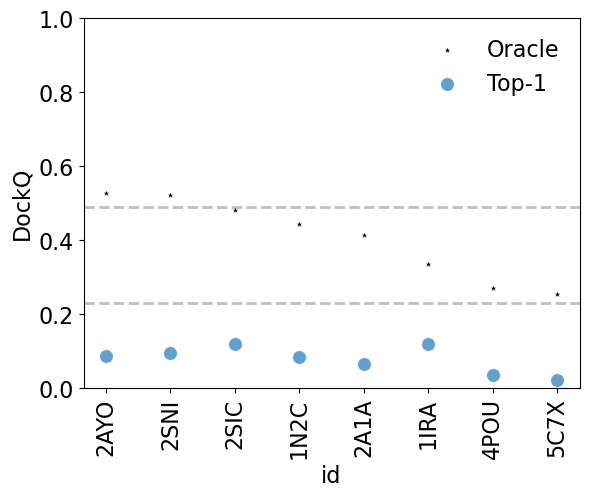

In [6]:
merged_df = merged_df.sort_values(by='DockQ_best', ascending=False)
filtered_df = merged_df[merged_df['DockQ_best'] >= 0.23]

sns.scatterplot(data=filtered_df, x='id', y='DockQ_best', label='Oracle', color='black', marker='*', s=30, alpha=1.0)
sns.scatterplot(data=filtered_df, x='id', y='DockQ_top1', label='Top-1', marker='o', s=100, alpha=0.7)
plt.axhline(y=0.23, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.axhline(y=0.49, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.legend(frameon=False)
plt.ylabel('DockQ')
plt.ylim(0, 1)
plt.show()

In [7]:
filtered_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,confidence_logits_top1,num_clashes_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,confidence_logits_best,num_clashes_best,run_best,method_best
5,2AYO,67,6.410806,7.543690,16.110460,0.000000,0.085263,-0.277879,0.103317,18,...,2.489014,2.615423,6.623641,0.714286,0.527995,-0.276872,0.104866,2,0,Oracle
16,2SNI,33,5.007354,5.407715,16.554703,0.000000,0.093358,-0.276785,0.082334,3,...,2.042610,1.816418,6.507082,0.531250,0.522399,-0.276529,0.080669,0,0,Oracle
3,2SIC,7,8.787841,6.804770,21.215761,0.171429,0.118694,-0.277960,0.044007,6,...,2.100939,2.012110,5.732014,0.400000,0.481541,-0.277488,0.046209,1,0,Oracle
10,1N2C,67,16.212025,11.794698,31.005005,0.163265,0.083028,-0.277396,-0.017034,201,...,3.381406,2.917078,9.478772,0.673469,0.442770,-0.275875,0.030919,11,0,Oracle
2,2A1A,71,9.043381,5.418968,22.736462,0.000000,0.064598,-0.278052,0.066821,11,...,7.391806,4.941333,19.973301,0.999999,0.412570,-0.277554,0.068924,9,0,Oracle
21,1IRA,87,6.560348,8.166768,12.241323,0.000000,0.119313,-0.276414,0.070974,4,...,5.547283,7.184310,10.560845,0.571429,0.335444,-0.274278,0.075826,4,0,Oracle
7,4POU,49,13.132813,9.812618,29.177700,0.000000,0.033687,-0.277681,0.034519,12,...,6.905455,4.493441,18.939386,0.538461,0.268792,-0.277401,0.028901,12,0,Oracle
19,5C7X,18,16.546276,11.726685,40.027748,0.000000,0.019749,-0.276522,0.040981,36,...,5.444096,6.139714,13.214662,0.411765,0.253582,-0.275204,0.025169,8,0,Oracle


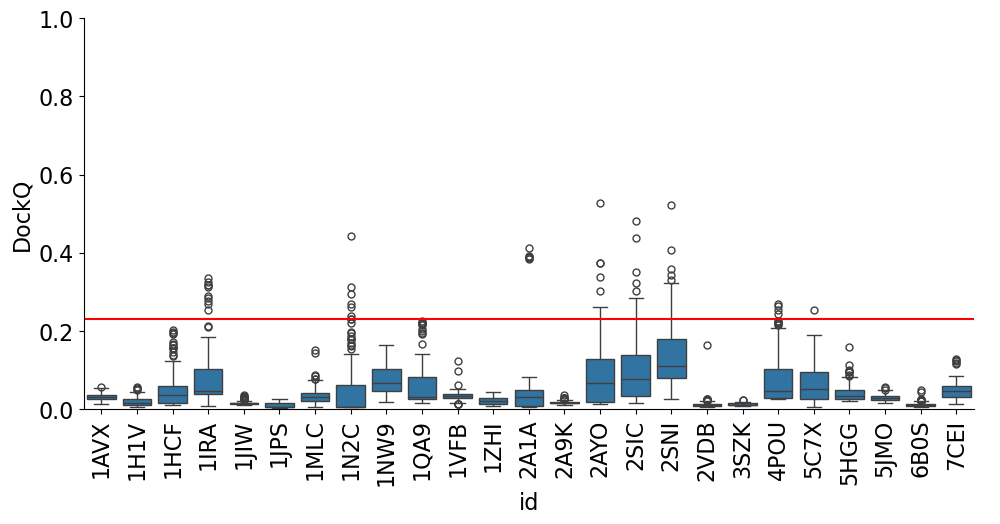

In [8]:
sns.catplot(data=df, x='id', y='DockQ', kind='box', height=5, aspect=2)
plt.xticks(rotation=90)
plt.axhline(y = 0.23, color='r')
plt.ylim(0, 1)
plt.show()